## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  77.326924  1242.564363  0.115231  3.228002  1.011090
1  12.882423   963.707076  0.160927  6.504351  1.348190
2  61.653252   649.228991  0.122024  3.813188  1.008458
3  40.773650   709.595359  0.870710  1.997277  1.538842
4  85.619117   310.113966  0.587519  2.148857  1.003507


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0389486	total: 65.6ms	remaining: 1m 5s
1:	learn: 1.0301146	total: 66.1ms	remaining: 33s
2:	learn: 1.0198193	total: 66.6ms	remaining: 22.1s
3:	learn: 1.0086921	total: 67.1ms	remaining: 16.7s
4:	learn: 0.9987933	total: 67.7ms	remaining: 13.5s
5:	learn: 0.9894254	total: 68.2ms	remaining: 11.3s
6:	learn: 0.9799748	total: 68.8ms	remaining: 9.76s
7:	learn: 0.9696495	total: 69.4ms	remaining: 8.6s
8:	learn: 0.9599900	total: 69.8ms	remaining: 7.68s
9:	learn: 0.9506132	total: 70.4ms	remaining: 6.96s
10:	learn: 0.9409779	total: 70.8ms	remaining: 6.36s
11:	learn: 0.9303047	total: 71.2ms	remaining: 5.86s
12:	learn: 0.9212618	total: 71.7ms	remaining: 5.44s
13:	learn: 0.9127025	total: 72.1ms	remaining: 5.08s
14:	learn: 0.9037773	total: 72.5ms	remaining: 4.76s
15:	learn: 0.8961914	total: 73ms	remaining: 4.49s
16:	learn: 0.8868250	total: 73.3ms	remaining: 4.24s
17:	learn: 0.8784852	total: 73.7ms	remaining: 4.02s
18:	learn: 0.8706551	total: 74.1ms	remaining: 3.8

94:	learn: 0.4760351	total: 109ms	remaining: 1.04s
95:	learn: 0.4729902	total: 110ms	remaining: 1.03s
96:	learn: 0.4699462	total: 110ms	remaining: 1.03s
97:	learn: 0.4673370	total: 111ms	remaining: 1.02s
98:	learn: 0.4648638	total: 111ms	remaining: 1.01s
99:	learn: 0.4619110	total: 111ms	remaining: 1s
100:	learn: 0.4593132	total: 112ms	remaining: 997ms
101:	learn: 0.4560764	total: 112ms	remaining: 990ms
102:	learn: 0.4533622	total: 113ms	remaining: 983ms
103:	learn: 0.4502567	total: 113ms	remaining: 977ms
104:	learn: 0.4470261	total: 114ms	remaining: 971ms
105:	learn: 0.4447733	total: 114ms	remaining: 965ms
106:	learn: 0.4423168	total: 115ms	remaining: 958ms
107:	learn: 0.4393594	total: 115ms	remaining: 951ms
108:	learn: 0.4365743	total: 116ms	remaining: 946ms
109:	learn: 0.4333590	total: 116ms	remaining: 940ms
110:	learn: 0.4302698	total: 117ms	remaining: 935ms
111:	learn: 0.4284665	total: 117ms	remaining: 928ms
112:	learn: 0.4254262	total: 117ms	remaining: 922ms
113:	learn: 0.4229546

275:	learn: 0.2156233	total: 187ms	remaining: 489ms
276:	learn: 0.2147687	total: 187ms	remaining: 488ms
277:	learn: 0.2143313	total: 187ms	remaining: 487ms
278:	learn: 0.2137551	total: 188ms	remaining: 485ms
279:	learn: 0.2130754	total: 188ms	remaining: 484ms
280:	learn: 0.2125238	total: 189ms	remaining: 483ms
281:	learn: 0.2121013	total: 189ms	remaining: 481ms
282:	learn: 0.2114989	total: 190ms	remaining: 480ms
283:	learn: 0.2110919	total: 190ms	remaining: 479ms
284:	learn: 0.2102088	total: 191ms	remaining: 478ms
285:	learn: 0.2096209	total: 191ms	remaining: 476ms
286:	learn: 0.2092780	total: 191ms	remaining: 475ms
287:	learn: 0.2083623	total: 192ms	remaining: 473ms
288:	learn: 0.2078502	total: 192ms	remaining: 472ms
289:	learn: 0.2064970	total: 192ms	remaining: 471ms
290:	learn: 0.2058123	total: 193ms	remaining: 469ms
291:	learn: 0.2053735	total: 193ms	remaining: 468ms
292:	learn: 0.2049639	total: 194ms	remaining: 467ms
293:	learn: 0.2044856	total: 194ms	remaining: 466ms
294:	learn: 

513:	learn: 0.1019185	total: 290ms	remaining: 274ms
514:	learn: 0.1016065	total: 291ms	remaining: 274ms
515:	learn: 0.1012525	total: 291ms	remaining: 273ms
516:	learn: 0.1009402	total: 292ms	remaining: 272ms
517:	learn: 0.1004639	total: 292ms	remaining: 272ms
518:	learn: 0.1003080	total: 292ms	remaining: 271ms
519:	learn: 0.0999628	total: 293ms	remaining: 270ms
520:	learn: 0.0997128	total: 293ms	remaining: 270ms
521:	learn: 0.0993761	total: 294ms	remaining: 269ms
522:	learn: 0.0991151	total: 294ms	remaining: 268ms
523:	learn: 0.0987102	total: 295ms	remaining: 268ms
524:	learn: 0.0983463	total: 295ms	remaining: 267ms
525:	learn: 0.0981946	total: 296ms	remaining: 267ms
526:	learn: 0.0978671	total: 296ms	remaining: 266ms
527:	learn: 0.0973074	total: 297ms	remaining: 265ms
528:	learn: 0.0970135	total: 297ms	remaining: 264ms
529:	learn: 0.0966328	total: 297ms	remaining: 264ms
530:	learn: 0.0964846	total: 298ms	remaining: 263ms
531:	learn: 0.0961664	total: 298ms	remaining: 262ms
532:	learn: 

698:	learn: 0.0611654	total: 367ms	remaining: 158ms
699:	learn: 0.0609956	total: 368ms	remaining: 158ms
700:	learn: 0.0608394	total: 368ms	remaining: 157ms
701:	learn: 0.0606101	total: 369ms	remaining: 156ms
702:	learn: 0.0604627	total: 369ms	remaining: 156ms
703:	learn: 0.0602975	total: 369ms	remaining: 155ms
704:	learn: 0.0601496	total: 370ms	remaining: 155ms
705:	learn: 0.0600663	total: 370ms	remaining: 154ms
706:	learn: 0.0599146	total: 370ms	remaining: 154ms
707:	learn: 0.0596914	total: 371ms	remaining: 153ms
708:	learn: 0.0595807	total: 371ms	remaining: 152ms
709:	learn: 0.0594182	total: 372ms	remaining: 152ms
710:	learn: 0.0591943	total: 372ms	remaining: 151ms
711:	learn: 0.0590474	total: 373ms	remaining: 151ms
712:	learn: 0.0588573	total: 373ms	remaining: 150ms
713:	learn: 0.0587508	total: 374ms	remaining: 150ms
714:	learn: 0.0585929	total: 374ms	remaining: 149ms
715:	learn: 0.0583752	total: 374ms	remaining: 149ms
716:	learn: 0.0582382	total: 375ms	remaining: 148ms
717:	learn: 

942:	learn: 0.0323763	total: 471ms	remaining: 28.5ms
943:	learn: 0.0322528	total: 471ms	remaining: 28ms
944:	learn: 0.0321509	total: 472ms	remaining: 27.5ms
945:	learn: 0.0320298	total: 472ms	remaining: 27ms
946:	learn: 0.0319409	total: 473ms	remaining: 26.4ms
947:	learn: 0.0318220	total: 473ms	remaining: 25.9ms
948:	learn: 0.0317493	total: 473ms	remaining: 25.4ms
949:	learn: 0.0316460	total: 474ms	remaining: 24.9ms
950:	learn: 0.0316107	total: 474ms	remaining: 24.4ms
951:	learn: 0.0315388	total: 475ms	remaining: 23.9ms
952:	learn: 0.0315042	total: 475ms	remaining: 23.4ms
953:	learn: 0.0314546	total: 475ms	remaining: 22.9ms
954:	learn: 0.0314176	total: 476ms	remaining: 22.4ms
955:	learn: 0.0312999	total: 476ms	remaining: 21.9ms
956:	learn: 0.0312883	total: 477ms	remaining: 21.4ms
957:	learn: 0.0312598	total: 477ms	remaining: 20.9ms
958:	learn: 0.0311441	total: 478ms	remaining: 20.4ms
959:	learn: 0.0310525	total: 478ms	remaining: 19.9ms
960:	learn: 0.0310410	total: 478ms	remaining: 19.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

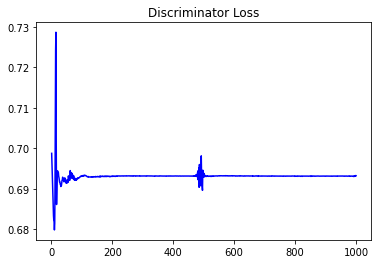

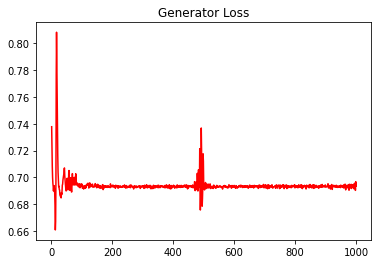

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.28866094361258127


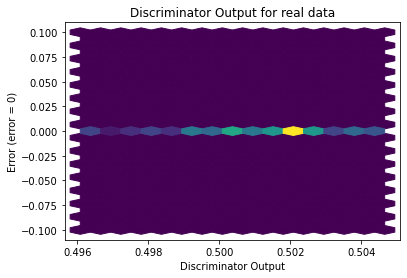

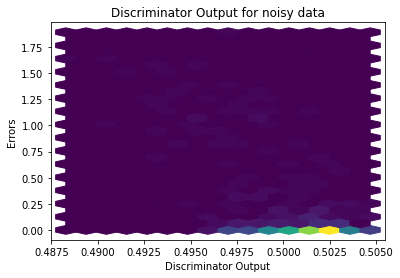

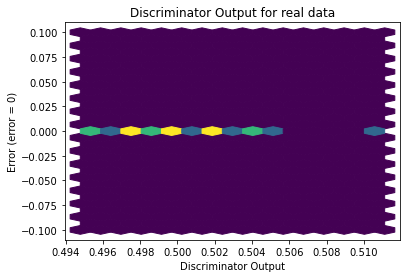

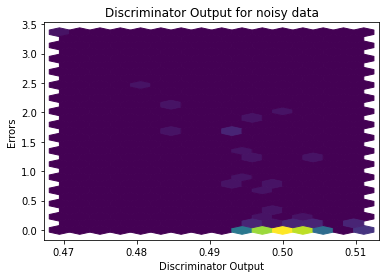

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


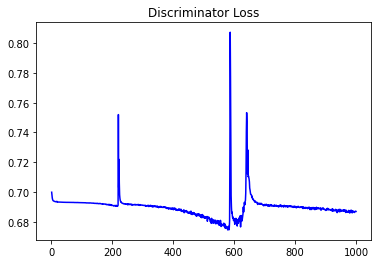

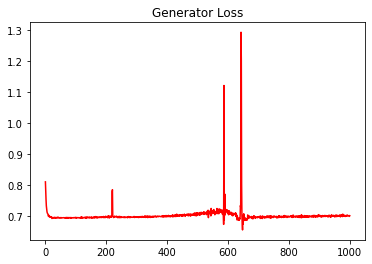

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.23400428180295238


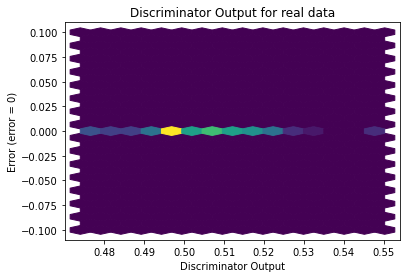

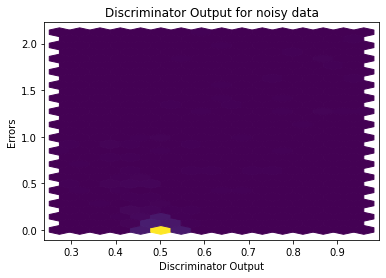

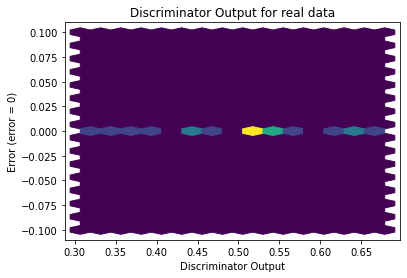

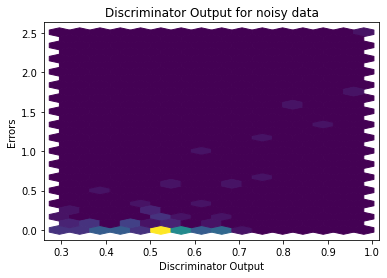

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
